Performing all the tests on MAE(Mean Absolute Error)

'''

The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution.
A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.

Fail to Reject: Paired sample distributions are equal.
Reject: Paired sample distributions are not equal.

'''

null hypothesis - all algorithms have the same performance

In [1]:
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
from matplotlib import colors as color
import seaborn as sns
import matplotlib.patches as pat
import pandas as pd
import numpy as np 
import os

In [3]:
def friedman(dat):
    data1 = np.array(dat['Word2vec'])
    data2 = np.array(dat['BOW-TFIDF'])
    data3 = np.array(dat['Simple encoder-decoder'])
    data4 = np.array(dat['Google universal encoder'])
    data5 = np.array(dat['Skip-Thoughts'])
    data6 = np.array(dat['InferSent'])
    # compare samples
    stat, p = friedmanchisquare(data1, data2, data3, data4, data5, data6)
    print('Friedman-chi-square=%.3f' % (stat))
    print('p=%.3f' % (p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('All algorithms have same performance(fail to reject)')
    else:
        print('All algorithms do not have same performance and at least one of them behaves differently. (reject)')

In [21]:
def ran_mean(dat):
    dat_1 = dat.copy()
    #dat_1.loc['mean'] = dat_1.mean()
    dat_2 = dat_1.rank(1, ascending=True, method='first')
    dat_2.loc['mean'] = dat_2.mean()
    dat_1.loc['mean'] = dat_1.mean()
    siz = [16892, 1412, 159, 566, 411, 1311, 145, 5750, 2461, 1598, 728, 2387, 266, 19118, 'Average']
    dat_1['si'] = siz
    dat_1 = dat_1.round(2)
    dat_2 = dat_2.round(2)
    dat_1 = dat_1.astype(str)
    dat_2 = dat_2.astype(str)
    dat_3 = pd.DataFrame()
    dat_3['Datasets(Size)'] = dat_1['MAE']+' '+'('+dat_1['si']+')'
    dat_3['word_vec'] = dat_1['Word2vec']+' '+'('+dat_2['Word2vec']+')'
    dat_3['bow_tfidf'] = dat_1['BOW-TFIDF']+' '+'('+dat_2['BOW-TFIDF']+')'
    dat_3['seq2seq'] = dat_1['Simple encoder-decoder']+' '+'('+dat_2['Simple encoder-decoder']+')'
    dat_3['google_enc'] = dat_1['Google universal encoder']+' '+'('+dat_2['Google universal encoder']+')'
    dat_3['skip_thoughts'] = dat_1['Skip-Thoughts']+' '+'('+dat_2['Skip-Thoughts']+')'
    dat_3['infer_sent'] = dat_1['InferSent']+' '+'('+dat_2['InferSent']+')'
    dat_3 = dat_3[['Datasets(Size)','word_vec','bow_tfidf','seq2seq','google_enc','skip_thoughts','infer_sent']]
    return dat_3

In [5]:
fname = 'final_mae.csv'
filename = os.path.join('/Users/rithika/Documents/247ai/summer-internship/RF_results', fname)
if os.path.isfile(filename):
    dat = pd.read_csv(filename)
else:
    print("no such file exists at this time")

In [6]:
dat

,MAE,Word2vec,BOW-TFIDF,Simple encoder-decoder,Google universal encoder,Skip-Thoughts,InferSent
0,Digitonomy,0.4192,0.3973,0.3921,0.4325,0.4160,0.4120
1,HP,210.5981,215.4916,210.7356,212.8375,246.6867,201.3548
2,Blackhawk Network,355.2656,362.5687,367.0273,363.3478,368.8844,352.0176
3,HPE,21.5612,20.5561,20.3592,21.6986,36.7214,24.5632
4,Samsung,59.6761,57.3306,55.5765,58.8666,58.7861,57.2004
5,Serenata Flowers,2.6990,2.3122,4.2078,3.0337,5.6444,3.3174
6,Snooze,55.7089,57.1904,54.2043,56.7799,60.9058,55.3575
7,Subaru,6.6836,6.6104,6.6781,6.4666,6.8931,6.5182
8,The Holiday Place,6.3274,6.6131,6.6548,6.4542,6.4192,6.2853
9,Zalora HK,0.9840,1.0164,1.0145,0.9913,1.0547,1.0275


In [7]:
first_plot = pd.melt(dat, id_vars="MAE", var_name="models", value_name="absolute_error")

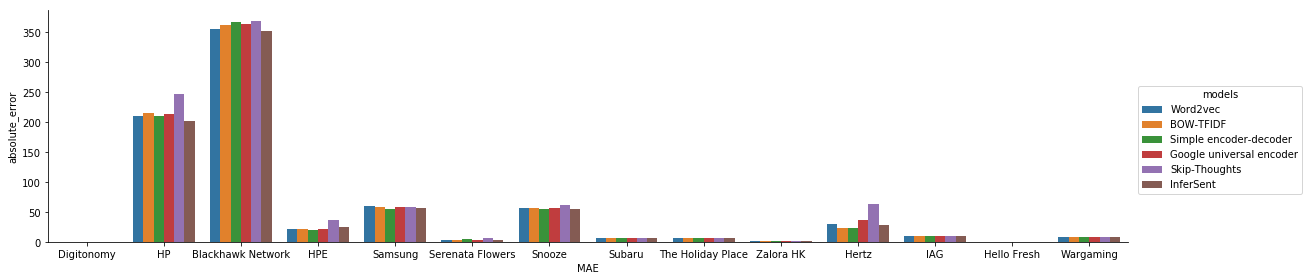

In [8]:
%matplotlib inline
sns.factorplot(x='MAE', y='absolute_error', hue='models', data=first_plot, kind='bar', aspect=400/100)
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/ori_mae.png')
plt.show()
#plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/ori_mae.png')

In [9]:
rank_dat = dat.copy()
rank_dat = rank_dat.rank(1, ascending=True, method='first')

In [10]:
r_dat = pd.concat([dat['MAE'],rank_dat],axis=1).sort_index(axis=1)

In [11]:
rank_plot = pd.melt(r_dat, id_vars="MAE", var_name="model", value_name="rank")

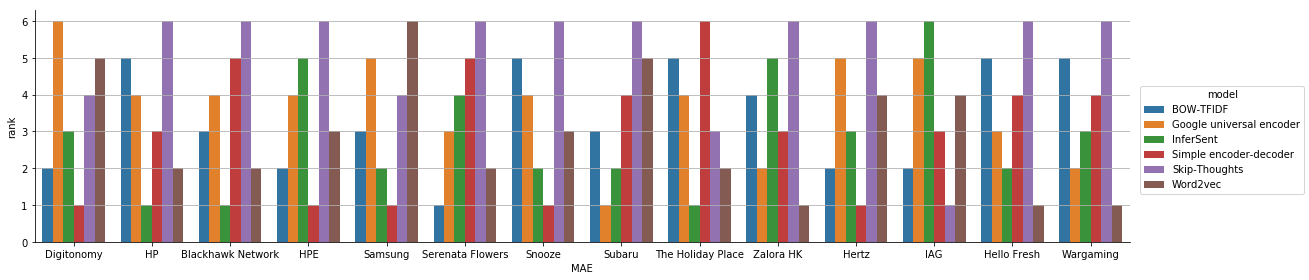

In [12]:
%matplotlib inline
sns.factorplot(x='MAE', y='rank', hue='model', data=rank_plot, kind='bar', aspect=400/100)
plt.grid(axis='y')
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/rank_mae.png')
plt.show()

In [13]:
m_dat = rank_dat.copy()
m_dat.loc['mean'] = m_dat.mean()

In [14]:
pl = m_dat.loc['mean'].values.tolist()

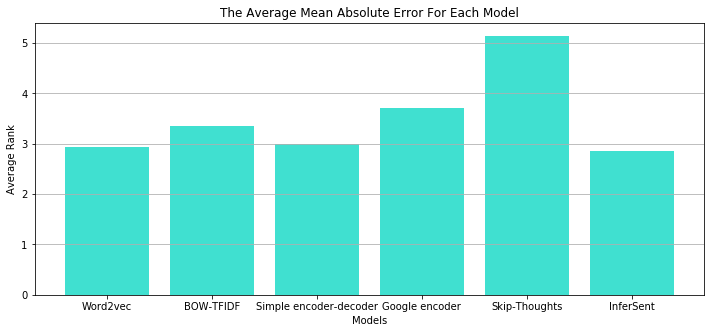

In [15]:
plt.figure(figsize=(12,5))
x = [1,2,3,4,5,6]
plt.bar(x,pl,color='turquoise')#, height=10)
plt.xticks([1,2,3,4,5,6],['Word2vec','BOW-TFIDF','Simple encoder-decoder','Google encoder','Skip-Thoughts','InferSent'])
plt.title('The Average Mean Absolute Error For Each Model')
plt.xlabel('Models')
plt.ylabel('Average Rank')
plt.grid(axis='y')
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/MAE.png')
plt.show()

In [16]:
m_dat

,Word2vec,BOW-TFIDF,Simple encoder-decoder,Google universal encoder,Skip-Thoughts,InferSent
0,5.000000,2.000000,1.0,6.000000,4.000000,3.000000
1,2.000000,5.000000,3.0,4.000000,6.000000,1.000000
2,2.000000,3.000000,5.0,4.000000,6.000000,1.000000
3,3.000000,2.000000,1.0,4.000000,6.000000,5.000000
4,6.000000,3.000000,1.0,5.000000,4.000000,2.000000
5,2.000000,1.000000,5.0,3.000000,6.000000,4.000000
6,3.000000,5.000000,1.0,4.000000,6.000000,2.000000
7,5.000000,3.000000,4.0,1.000000,6.000000,2.000000
8,2.000000,5.000000,6.0,4.000000,3.000000,1.000000
9,1.000000,4.000000,3.0,2.000000,6.000000,5.000000


In [17]:
friedman(dat)

Friedman-chi-square=15.082
p=0.010
All algorithms do not have same performance and at least one of them behaves differently. (reject)


In [22]:
visual = ran_mean(dat)

In [23]:
visual

,Datasets(Size),word_vec,bow_tfidf,seq2seq,google_enc,skip_thoughts,infer_sent
0,Digitonomy (16892),0.42 (5.0),0.4 (2.0),0.39 (1.0),0.43 (6.0),0.42 (4.0),0.41 (3.0)
1,HP (1412),210.6 (2.0),215.49 (5.0),210.74 (3.0),212.84 (4.0),246.69 (6.0),201.35 (1.0)
2,Blackhawk Network (159),355.27 (2.0),362.57 (3.0),367.03 (5.0),363.35 (4.0),368.88 (6.0),352.02 (1.0)
3,HPE (566),21.56 (3.0),20.56 (2.0),20.36 (1.0),21.7 (4.0),36.72 (6.0),24.56 (5.0)
4,Samsung (411),59.68 (6.0),57.33 (3.0),55.58 (1.0),58.87 (5.0),58.79 (4.0),57.2 (2.0)
5,Serenata Flowers (1311),2.7 (2.0),2.31 (1.0),4.21 (5.0),3.03 (3.0),5.64 (6.0),3.32 (4.0)
6,Snooze (145),55.71 (3.0),57.19 (5.0),54.2 (1.0),56.78 (4.0),60.91 (6.0),55.36 (2.0)
7,Subaru (5750),6.68 (5.0),6.61 (3.0),6.68 (4.0),6.47 (1.0),6.89 (6.0),6.52 (2.0)
8,The Holiday Place (2461),6.33 (2.0),6.61 (5.0),6.65 (6.0),6.45 (4.0),6.42 (3.0),6.29 (1.0)
9,Zalora HK (1598),0.98 (1.0),1.02 (4.0),1.01 (3.0),0.99 (2.0),1.05 (6.0),1.03 (5.0)


In [2]:
fname1 = 'post_hoc_mae.csv'
filename1 = os.path.join('/Users/rithika/Documents/247ai/summer-internship/RF_results', fname1)
if os.path.isfile(filename1):
    dat1 = pd.read_csv(filename1)
else:
    print("no such file exists at this time")

In [4]:
dat1

,Post-Hoc (MAE),p-value
0,Skip-thoughts Vs InferSent,0.015
1,Skip-thoughts Vs Word2Vec,0.020
2,Skip-thoughts Vs Simple encoder-decoder,0.020
3,Skip-thoughts Vs Bow-tfidf,0.080
4,Skip-thoughts Vs Google universal Encoder,0.300
5,Google universal Encoder Vs InferSent,2.060
6,Google universal Encoder Vs Word2Vec,2.060
7,Google universal Encoder Vs Simple encoder-dec...,2.060
8,Bow-tfidf Vs InferSent,2.692
9,Bow-tfidf Vs Word2Vec,2.692


In [5]:
fname2 = 'post_hoc_mse.csv'
filename2 = os.path.join('/Users/rithika/Documents/247ai/summer-internship/RF_results', fname2)
if os.path.isfile(filename2):
    dat2 = pd.read_csv(filename2)
else:
    print("no such file exists at this time")

In [6]:
dat2

,Post-Hoc(MSE),p-value
0,Skip-thoughts Vs InferSent,0.036
1,Skip-thoughts Vs Word2Vec,0.036
2,Skip-thoughts Vs Simple encoder-decoder,0.384
3,Skip-thoughts Vs Bow-tfidf,0.742
4,Skip-thoughts Vs Google universal Encoder,0.036
5,Google universal Encoder Vs InferSent,3.047
6,Google universal Encoder Vs Word2Vec,3.047
7,Google universal Encoder Vs Simple encoder-dec...,1.598
8,Bow-tfidf Vs InferSent,1.572
9,Bow-tfidf Vs Word2Vec,1.572
